<a href="https://colab.research.google.com/github/sagarrokad1/Speech-Emotion-Recognition/blob/main/Notebooks/1_base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Speech Emotion Recognition(SER)**

###**Emotion classification using the RAVDESS dataset**

The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) is licensed under CC BY-NA-SC 4.0. and can be downloaded free of charge at https://zenodo.org/record/1188976.

**Construction and Validation**

Construction and validation of the RAVDESS is described in our paper: Livingstone SR, Russo FA (2018) The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English. PLoS ONE 13(5): e0196391. https://doi.org/10.1371/journal.pone.0196391.

The RAVDESS contains 7356 files. Each file was rated 10 times on emotional validity, intensity, and genuineness. Ratings were provided by 247 individuals who were characteristic of untrained adult research participants from North America. A further set of 72 participants provided test-retest data. High levels of emotional validity, interrater reliability, and test-retest intrarater reliability were reported. Validation data is open-access, and can be downloaded along with our paper from PLOS ONE.

**Description**

The dataset contains the complete set of 7356 RAVDESS files (total size: 24.8 GB). Each of the 24 actors consists of three modality formats: Audio-only (16bit, 48kHz .wav), Audio-Video (720p H.264, AAC 48kHz, .mp4), and Video-only (no sound). Note, there are no song files for Actor_18.

**Data**

For this task, we are using 1440 samples from the RAVDESS dataset.

The samples comes from:


**Audio-files(speech only)**

**License information**

The RAVDESS is released under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License, CC BY-NA-SC 4.0

**File naming convention**

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics:

**Filename identifiers**

*   Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
*   Vocal channel (01 = speech, 02 = song).
*   Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
*   Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the ‘neutral’ emotion.
*   Statement (01 = “Kids are talking by the door”, 02 = “Dogs are sitting by the door”).
*   Repetition (01 = 1st repetition, 02 = 2nd repetition).
*   Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


Filename example: 02-01-06-01-02-01-12.mp4

*   Video-only (02)
*   Speech (01)
*   Fearful (06)
*   Normal intensity (01)
*   Statement “dogs” (02)
*   1st Repetition (01)
*   12th Actor (12)
*   Female, as the actor ID number is even.


## **Analysis**
We are using Google Colab, a Google Cloud environment for jupyter, so we need to import our files from Google Drive and then install LibROSA, a python package for music and audio analysis.

After the import, we will plot the signal of the first file.



###**Importing Libraries**

In [ ]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
from tqdm import tqdm

import os, glob, sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline

import soundfile as sf
import IPython.display as ipd
from IPython.display import Audio

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D, MaxPool2D, Conv1D, MaxPool1D

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#mounting the google drive to import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
audio = "/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/Audio_data/"

# **Data Preprocessing**

### **Male Happy**

Text(0.5, 1.0, 'Waveplot - Male Happy')

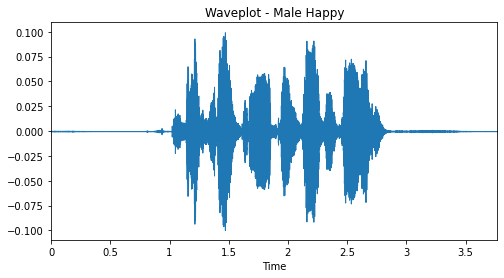

In [ ]:
# DISPLAY WAVEPLOT
x, sr = librosa.load(f'/{audio}/Actor_03/03-01-03-01-01-01-03.wav')

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')

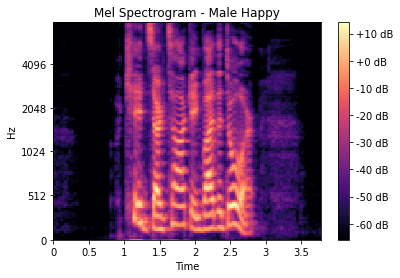

In [ ]:
# CREATE LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.colorbar(format='%+2.0f dB');

### **Male Angry**

Text(0.5, 1.0, 'Waveplot - Male Angry')

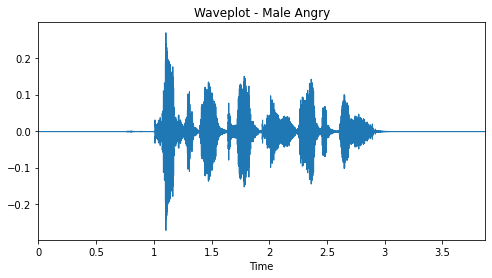

In [ ]:
# LOAD FILE
x, sr = librosa.load(f'/{audio}/Actor_05/03-01-05-01-01-01-05.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')

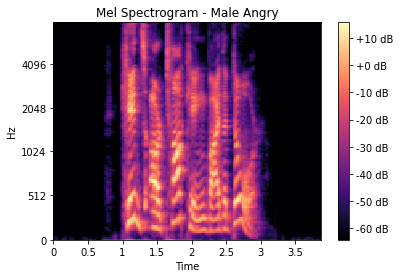

In [ ]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.colorbar(format='%+2.0f dB');

#### **Female Fearful**

Text(0.5, 1.0, 'Waveplot - Female Fearful')

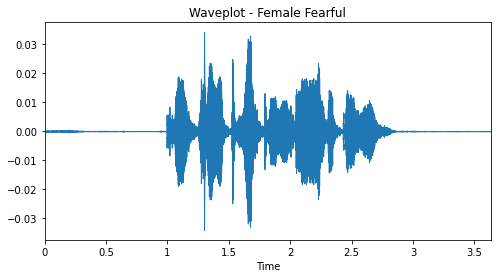

In [ ]:
# LOAD FILE
x, sr = librosa.load(f'/{audio}/Actor_06/03-01-06-01-01-01-06.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')

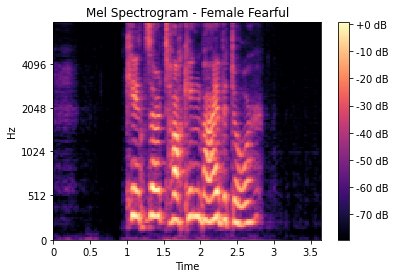

In [ ]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.colorbar(format='%+2.0f dB');

#### **Female Surprised**

Text(0.5, 1.0, 'Waveplot - FemaleSurprised')

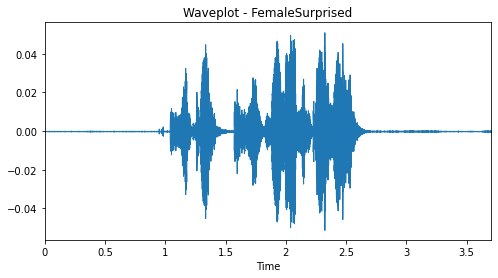

In [ ]:
# LOAD FILE
x, sr = librosa.load(f'/{audio}/Actor_08/03-01-08-01-01-01-08.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')

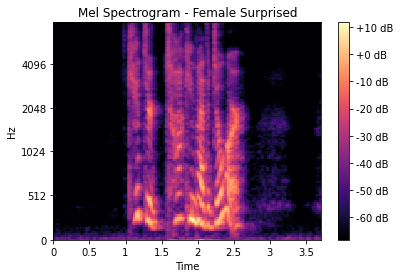

In [ ]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.colorbar(format='%+2.0f dB');

**So in above plots we have created a Waveplots and Mel Spectrograms for different emotions classifications.**

In [ ]:
# CREATE DIRECTORY OF AUDIO FILES 
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

**We have converted audio speech files into List dtype.**

In [ ]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [ ]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df.head()

,gender,emotion,actor,path
0,male,neutral,1,/content/drive/MyDrive/AlmaBetter/Capstone Pro...
1,male,neutral,1,/content/drive/MyDrive/AlmaBetter/Capstone Pro...
2,male,calm,1,/content/drive/MyDrive/AlmaBetter/Capstone Pro...
3,male,neutral,1,/content/drive/MyDrive/AlmaBetter/Capstone Pro...
4,male,calm,1,/content/drive/MyDrive/AlmaBetter/Capstone Pro...


**So we have extracted the audio speech files path and created a DataFrame out of it.**

In [ ]:
#shape of the dataframe
audio_df.shape

(1440, 4)

# **Data Visualisation**

###**Count of different types of emotions**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


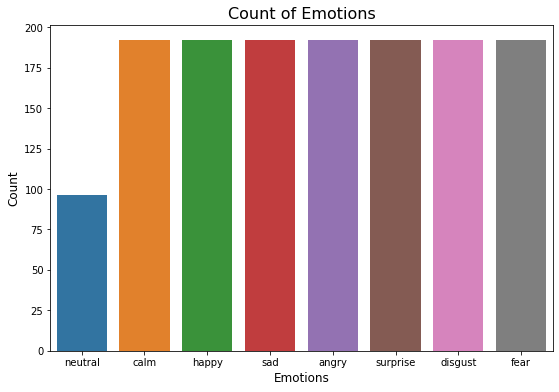

In [ ]:
plt.figure(figsize=(9,6))
plt.title('Count of Emotions', size=16)
sns.countplot(audio_df.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
# sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

**From the above plot we can see that we have 8 distinct emotions(classifications) in our dataset.**

In [ ]:
# EXPORT TO CSV
audio_df.to_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/audio.csv')

In [ ]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1

In [ ]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [ ]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [ ]:
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.367455,-76.372063,-76.384773,-76.384773,-76.173912,-75.719101,-75.941528,-75.642616,-75.908943,-75.830963,-75.750702,-74.779770,-72.831291,-71.263046,-66.522675,-66.223503,-70.020477,-72.228935,-72.313690,-73.103096,-73.700745,...,-76.307678,-76.327888,-76.380356,-76.322456,-76.256866,-76.058685,-76.228973,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,neutral,1,-75.335518,-75.445320,-75.554031,-75.203949,-75.230530,-75.319374,-75.653793,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,-75.556015,-75.118057,-75.059258,-75.370628,-75.391228,-75.651840,-75.720039,-75.720039,-75.547119,-75.301353,-75.143791,-75.149933,-75.406776,-72.989136,-65.364212,-66.216202,-71.882805,-61.773552,-55.712582,-54.201565,-59.008545,-65.380852,-71.747086,-73.445030,-74.108345,...,-75.718483,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,-75.715614,-75.720039,-75.720039,-75.583420,-75.506737,-75.720039,-75.720039,-75.720039,-75.661255,-75.433395,-75.672539,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,calm,1,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.651207,-76.677536,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.804527,-76.532204,-76.449333,-76.649521,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,...,-75.776962,-76.708275,-76.758972,-76.822235,-76.635643,-75.804024,-75.791672,-76.233810,-76.709061,-76.738503,-76.742928,-76.783592,-76.828041,-76.799324,-76.765839,-76.828041,-76.828041,-76.828041,-76.799454,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.805473,-76.828041
3,male,neutral,1,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.243004,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.245277,-75.045677,-74.991676,-75.199890,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-74.348541,-73.925392,...,-74.795807,-74.800621,-74.906258,-75.227119,-75.110405,-74.772667,-74.482544,-74.728058,-75.072304,-75.161499,-75.264870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male,calm,1,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.610367,-79.611420,-79.550499,-79.398399,-79.582024,-79.611420,-79.611420,-79.602898,-79.609360,-79.611420,-79.610100,-79.575806,-79.363792,-79.245369,-79.572586,-79.611420,-79.104889,-78.065300,-78.346611,-79.328812,-79.611420,-79.380302,-76.994888,-69.494263,-67.42049

**New dataframe after extracting distinct features from the dataset through Mel Spectrogram.**

###**Prepping Data for Modelling**

In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['emotion','gender','actor']])

In [ ]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

(1152, 259)


In [ ]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(288, 259)


####**Data Preprocessing**

In [ ]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

**So we have normalized our data for the stable prediction.**

In [ ]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [ ]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(1152, 259, 1)

##**Initial Model(Base model)**

In [ ]:
#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 250, 64)           704       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 30, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 128)            0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=32, epochs=50, validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/50
36/36 [==============================] - 30s 21ms/step - loss: 2.5111 - accuracy: 0.2248 - val_loss: 2.1936 - val_accuracy: 0.2465

Epoch 00001: val_accuracy improved from -inf to 0.24653, saving model to best_initial_model.hdf5
Epoch 2/50
36/36 [==============================] - 0s 12ms/step - loss: 2.0532 - accuracy: 0.2691 - val_loss: 1.9095 - val_accuracy: 0.3056

Epoch 00002: val_accuracy improved from 0.24653 to 0.30556, saving model to best_initial_model.hdf5
Epoch 3/50
36/36 [==============================] - 0s 11ms/step - loss: 1.8564 - accuracy: 0.3099 - val_loss: 1.8064 - val_accuracy: 0.3472

Epoch 00003: val_accuracy improved from 0.30556 to 0.34722, saving model to best_initial_model.hdf5
Epoch 4/50
36/36 [==============================] - 0s 10ms/step - loss: 1.7987 - accuracy: 0.3203 - val_loss: 1.7208 - val_accuracy: 0.3854

Epoch 00004: val_accuracy improved from 0.34722 to 0.38542, saving model to best_initial_model.hdf5
Epoch 5/50
36/36 [================

####**Model accuracy graph**

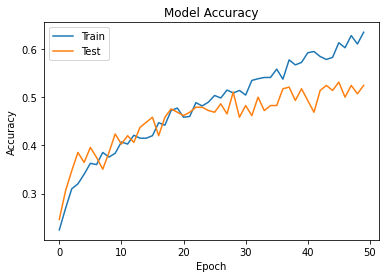

In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()

####**Model loss graph**

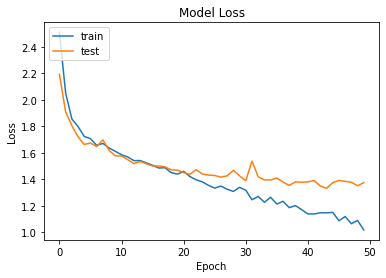

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

#### **Post-Model Analysis**

In [ ]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 5ms/step - loss: 1.3753 - accuracy: 0.5243
Loss of the model is -  1.3752877712249756
9/9 [==============================] - 0s 5ms/step - loss: 1.3753 - accuracy: 0.5243
Accuracy of the model is -  52.43055820465088 %


####**Actual vs Predicted**

In [ ]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[140:150]

,Actual Values,Predicted Values
140,sad,sad
141,surprise,surprise
142,neutral,sad
143,sad,neutral
144,fear,angry
145,sad,sad
146,disgust,disgust
147,angry,happy
148,surprise,happy
149,angry,surprise


####**Confusion Matrix**

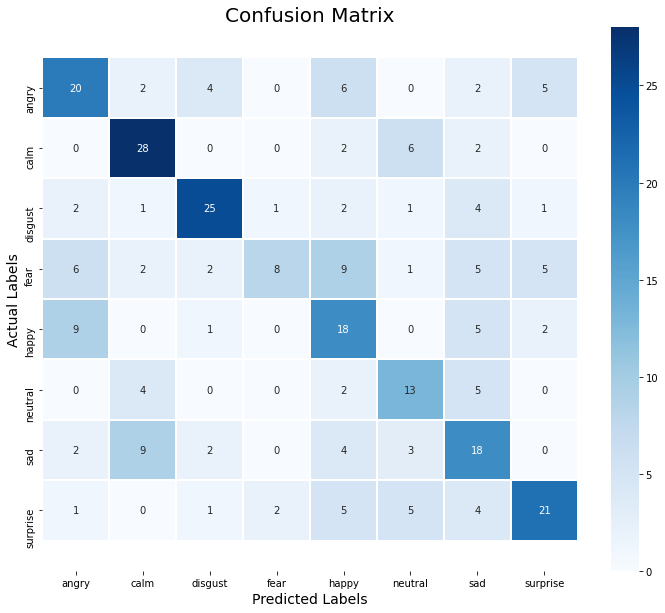

In [ ]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [ ]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.50      0.51      0.51        39
        calm       0.61      0.74      0.67        38
     disgust       0.71      0.68      0.69        37
        fear       0.73      0.21      0.33        38
       happy       0.38      0.51      0.43        35
     neutral       0.45      0.54      0.49        24
         sad       0.40      0.47      0.43        38
    surprise       0.62      0.54      0.58        39

    accuracy                           0.52       288
   macro avg       0.55      0.53      0.52       288
weighted avg       0.56      0.52      0.52       288



#### **Saving Model & Weights**

In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/model.hdf5')

In [ ]:
model.save_weights('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/myModel.h5')